In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
color_list = ['r', 'g', 'y', 'm']

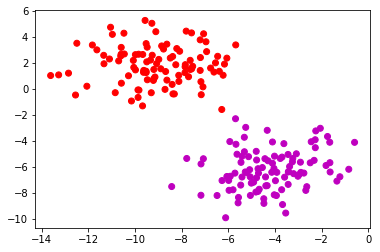

In [80]:
dataset = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=(1.5,1.5))
data = dataset[0]
datax = data[:,0]
datay = data[:,1]
label = dataset[1]

plt.scatter(data[:,0], data[:,1],
            c=label,
            cmap=matplotlib.colors.ListedColormap(color_list))

In [70]:
class SVMLinearClassifier(object):
    
    def __init__(self, lambd=None, X=None, Y=None):
        self.lambd = lambd
        self.W = None
        self.b = None
        if X is not None and Y is not None:
            self.set_data(X,Y)
        self.errors = []
    
    def set_data(self, X, Y):
        self.X = X
        self.Y = Y
        if X is not None:
            self.W = np.zeros(len(X[0]))
            self.b = 0.
        
    def optimize(self, epochs=10000, lr=1):
        #store misclassifications so we can plot how they change over time
        errors = []

        #training part, gradient descent part
        for epoch in range(1,epochs):
            lambda_ = 1/epoch if (self.lambd is None) else self.lambd
#             if self.lambd is None:
#                 lambda_ = 1/eopch
#             else: lambda_ = self.lambd
            err = 0
            for x,y in zip(self.X, self.Y):
                #misclassification
                out = np.dot(x, self.W) + self.b
                if (y*out) < 1:
                    #misclassified gradient for ours weights
                    gradW = (x * y) + (-2*lambda_* self.W)
                    gradb = (y) + (-2*lambda_*self.b)
#                     w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                    err += 1
                else:
                    #correct classification, gradient for our weights
                    gradW = (-2*lambda_* self.W)
                    gradb = (-2*lambda_*self.b)
                    
                    err += 0
                self.W = self.W + lr * gradW
                self.b = self.b + lr * gradb
            errors.append(err)
        self.errors += errors
        return errors

    def get_hyperplane(self, axis_index=0):
        mins, maxs = np.min(self.X, axis=0), np.max(self.X, axis=0)
        minai = mins[axis_index]
        maxai = maxs[axis_index]
        wai = np.delete(self.W, axis_index)
#         np.delete(np.array([0,1,2,3]), 2)
        y0 = (-self.b - self.W[axis_index]*minai)/wai
        y1 = (-self.b - self.W[axis_index]*maxai)/wai
        
        return [minai, maxai], [y0, y1]
            
    
    def predict(self, newX):
        if isinstance(newX, list):
            newX = np.array(newX)
        return np.sign(np.dot(newX,self.W)+self.b)
#         return np.dot(newX,self.W)+self.b
    
    
        

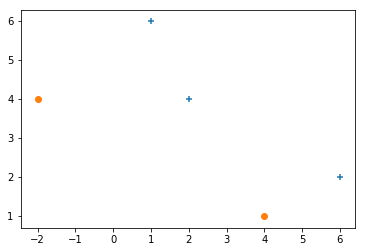

In [71]:
X = np.array([
    [-2,4],
    [4,1],
    [1, 6],
    [2, 4],
    [6, 2],
])
y = np.array([-1,-1,1,1,1])
X_test = np.array([[2,2],[4,3]]) # should output -1, 1
# plt.scatter(X[:,0], X[:,1], marker = ('+', '-'), c=y, cmap=matplotlib.colors.ListedColormap(color_list))

plt.scatter(X[:,0][y==1], X[:,1][y==1], marker='+')
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], marker='o')

In [72]:
svm = SVMLinearClassifier(X=X, Y=y)
errs = svm.optimize(epochs=1000)[::100]
print(errs)
svm.W, svm.b

[4, 3, 0, 0, 0, 0, 0, 0, 0, 0]


(array([1.2085235 , 2.19036058]), -8.246343445092064)

In [73]:
svm.predict(X_test)

array([-1.,  1.])

In [81]:
label[label==0] = -1
svm = SVMLinearClassifier(X=data, Y=label)
errors = svm.optimize(epochs=1000)[::100]
print(errors)

h = 0.1
xx, yy = np.meshgrid(np.arange(datax.min(), datax.max(), h), np.arange(datay.min(), datay.max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]
classxy = svm.predict(xxyy)

[100, 4, 6, 4, 0, 0, 0, 0, 0, 0]


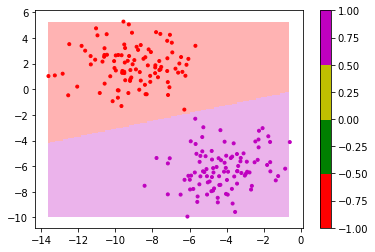

In [82]:
# advanced way of showing
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(color_list),
           alpha=0.3,
           aspect='auto', origin='lower')
# plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=label, cmap=matplotlib.colors.ListedColormap(color_list))
plt.colorbar()

In [83]:
# hyperplane is -> w0*x + w1*y + b = 0 equation
svm.W, svm.b

(array([ 1.70950574, -5.60407461]), 0.01977455549504908)

In [85]:
# mins, maxs = np.min(svm.X, axis=0), np.max(svm.X, axis=0)
# min0 = mins[0]
# max0 = maxs[0]
# y0 = (-svm.b - svm.W[0]*min0)/svm.W[1:]
# y1 = (-svm.b - svm.W[0]*max0)/svm.W[1:]
# y0,y1
xes, yes = svm.get_hyperplane(axis_index=0)

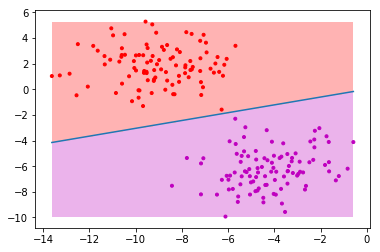

In [86]:
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(color_list),
           alpha=0.3,
           aspect='auto', origin='lower')
plt.plot(xes, yes)
plt.scatter(datax, datay, marker = '.', c=label, cmap=matplotlib.colors.ListedColormap(color_list))